In [1]:
# 4.2.1 Gradient Tensor

import torch

x=torch.ones(2, 2, requires_grad = True)    # requires_grad는 해당 텐서를 기준으로 모든 연산들을 추적해 Gradient라고 하는 미분값의 배열을 계산할 수 있게 함
y = x+1
z = 2*y**2
r = z.mean()
print("Result: ", r)

Result:  tensor(8., grad_fn=<MeanBackward0>)


In [2]:
r.backward()
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


In [3]:
# 4.2.2 자동 미분 - 선형회귀식
import torch
import matplotlib.pyplot as plt

x = torch.FloatTensor(range(5)).unsqueeze(1)    # range(5)를 이용해 tensor를 만들고 unsqueeze(1)는 1번째 위치의 차원을 늘리는 역할 -> torch.Size(5,1)
y = 2*x + torch.rand(5,1)
num_features = x.shape[1]

In [4]:
w = torch.randn(num_features, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [5]:
learning_rate = 1e-3
optimizer = optimizer = torch.optim.SGD([w, b], lr = learning_rate)    # 내부에 변수를 리스트로 묶어주고 적절한 학습률을 정하여 자동으로 가중치와 편향을 업데이트

In [7]:
loss_stack = []    # 매 epoch마다 손실 함수값을 저장하기 위해 빈 리스트 생성   
for epoch in range(1001):

  optimizer.zero_grad()    # 최적화는 계산을 누적시키니까 매 epoch마다 누적된 값을 촉초기화
  y_hat = torch.matmul(x, w) + b    # 회귀식 모델
  loss = torch.mean((y_hat - y) ** 2)    # (예측값 - 실제값)^2 MSE 손실 함수 계산
  loss.backward()    # 역전파의 기준을 손실 함수로 설정!!!
  optimizer.step()    # 미리 정의한 optimizer로 최적화 시행
  loss_stack.append(loss.item())    # 그래프 그리기 위해 손실 함수값만 빈 리스트에 저장

  if epoch % 100 == 0:
    print(f"Epoch {epoch}:{loss.item()}")

Epoch 0:7.0702972412109375
Epoch 100:0.7108709216117859
Epoch 200:0.2580054700374603
Epoch 300:0.20539669692516327
Epoch 400:0.18221251666545868
Epoch 500:0.16321951150894165
Epoch 600:0.14647069573402405
Epoch 700:0.13161417841911316
Epoch 800:0.11843027919530869
Epoch 900:0.10673041641712189
Epoch 1000:0.09634746611118317


In [8]:
with torch.no_grad():
  y_hat = torch.matmul(x, w) + b
# 최종 학습된 w, b로 예측값 산출, 최적화 사용하지 않으니 no_grad()로 제한

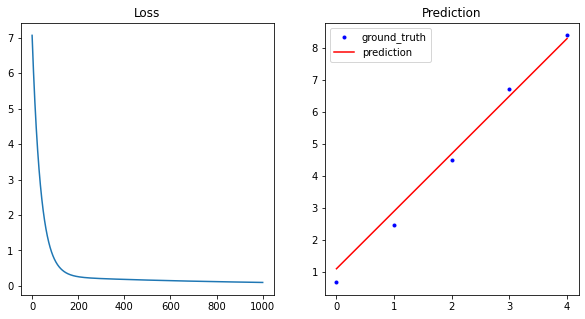

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")

plt.subplot(122)
plt.plot(x,y,'b.')
plt.plot(x,y_hat,'r-')
plt.legend(['ground_truth', 'prediction'])
plt.title("Prediction")

plt.show()